# Hotel Demand Prediction

### Overview

<ul>
    
<li>
Every year, more than 140 million bookings are made on the internet and many hotel bookings  made through top-visited travel websites like Booking.com, Expedia.com, Hotels.com, etc. 
</li>

<li>
    According to Google data, hotels are <b>booked in advance of 12 weeks</b>.
</li>
<li>
In this hackathon, we challenge data science enthusiasts to predict hotel booking cancellations  using 33 distinguishing features.
    </li>
<li>
    It would be very <b>helpful for the hotels</b> to have such a model to decide if a guest will actually 
come or not. So that they can plan things like personel and food requirements in advance.
    </li>

## Data and Libraries Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pycountry as pc

Matplotlib is building the font cache; this may take a moment.


In [2]:
train_data = pd.read_csv('train.csv',index_col=0)

In [3]:
train_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
Transaction_Id,,,,,,,,,,,,,,,,,,,,,
1001,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1002,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1003,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
1004,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
1005,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Cleaning

In [4]:
train_copy = train_data.copy()
train_copy.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,99996.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,85565.000000,5923.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.442070,106.339730,2016.03237,27.630900,15.728930,0.94293,2.55361,1.855180,0.102164,0.008260,0.035490,0.103800,0.160390,0.207940,97.376416,179.686645,2.754230,99.478089,0.068790,0.516830
std,0.496635,108.218604,0.68646,13.401401,8.764458,1.02108,1.98035,0.587716,0.396599,0.100359,0.185016,0.921528,1.632382,0.629464,114.289032,129.212578,19.155146,51.674414,0.256434,0.762222
min,0.000000,0.000000,2015.00000,1.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.00000,17.000000,8.000000,0.00000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,51.000000,0.000000,65.000000,0.000000,0.000000
50%,0.000000,71.000000,2016.00000,28.000000,16.000000,1.00000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,174.000000,0.000000,90.065000,0.000000,0.000000
75%,1.000000,165.000000,2017.00000,39.000000,23.000000,2.00000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,251.000000,0.000000,123.000000,0.000000,1.000000
max,1.000000,737.000000,2017.00000,53.000000,31.000000,19.00000,50.00000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 1. Missing Values

In [5]:
train_copy.isnull().sum().sort_values(ascending=False)[:5]

company      94077
agent        14435
country        487
children         4
lead_time        0
dtype: int64

The following 4 features has missing values (given with corresponding counts of missing values)

<table>
<tr>
    <th>Feature</th>
    <th>Missing Values</th>
</tr> 
<tr>
    <td>company</td>
    <td>94077</td>
</tr>
<tr>
    <td>agent</td>
    <td>14435</td>
</tr>
<tr>
    <td>country</td>
    <td>487 </td>
</tr>
    <tr>
    <td>children</td>
    <td>4</td>
</tr>
</table>

### 2. Dealing with missing Values

#### I) Company & II) Agent

In [6]:
train_copy['company'].value_counts()

40.0     855
223.0    784
67.0     267
45.0     228
281.0    138
        ... 
439.0      1
499.0      1
347.0      1
140.0      1
305.0      1
Name: company, Length: 329, dtype: int64

In [7]:
train_copy['agent'].value_counts()

9.0      22967
240.0    13922
1.0       7163
250.0     2870
6.0       2804
         ...  
59.0         1
451.0        1
367.0        1
158.0        1
304.0        1
Name: agent, Length: 307, dtype: int64

The company and agent corresponds to the **respective IDs** (may be a foriegn key). Hence, we can replace the missing values with 0 indicating the record has no agent or company involved

In [8]:
train_copy['company'].fillna(0, inplace=True)
train_copy['agent'].fillna(0, inplace=True)

#### III) Country

In [9]:
train_copy['country'].value_counts()

PRT    45875
GBR    10040
ESP     7333
FRA     7179
DEU     4974
       ...  
SYR        1
PLW        1
COM        1
ATA        1
MLI        1
Name: country, Length: 168, dtype: int64

We can see that the most repeating attribute of the feature is PRT (Portugal) and it can be a good measure of central tendancy due to the number of observations, hence we can replace the missing values with the mode.

In [10]:
train_copy['country'].fillna(train_data.country.mode().to_string(), inplace=True)

#### IV) Children

In [11]:
train_copy['children'].describe()

count    99996.000000
mean         0.102164
std          0.396599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

Children feature corresponds to the number of childrens *(numerical data)*. Hence the mean would be a good measure of central tendancy and it can be used to fill the missing values.

In [12]:
train_copy['children'].fillna(train_data.children.mean(), inplace=True)

In [13]:
train_copy.isnull().sum().sort_values(ascending=False)[0:5]

reservation_status_date    0
reservation_status         0
is_canceled                0
lead_time                  0
arrival_date_year          0
dtype: int64

### 3. Data type conversion

In [14]:
train_copy.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [15]:
train_copy[['children', 'company', 'agent']] = train_copy[['children', 'company', 'agent']].astype('int64')
train_copy.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [16]:
train_data = train_copy

## 2. Exploratory Data Analysis

### Utility Functions

In [17]:
def getCount(series):
    '''
       Takes in a series as input and returns the unique attributes along with its percentage
       
       Input:
           pandas series
       
       Output:
           X: Unique attributes in the series Y: % of unique attributes in the series
    '''
    count = series.value_counts()
    xValues = count.index
    yPercent = (count/count.sum())*100
    return xValues, yPercent

In [18]:
def myPlot(x,y,xLable,yLable,title,figsize,type):
    '''
        Takes in the series of data x and y along with the XLables, YLables, Title, Figure Size and Type of the chart to plot and plots the chart
        
        Input:
            x -> pandas series
            y -> pandas series
            XLable -> string corresponding to the lable for X Axis
            YLable -> string corresponding to the lable for Y Axis
            Title -> string corresponding to the Title of the graph
            Figure Size -> Size of the intended graph
            Type -> chart type
        Output:
            Plots the graph
    '''
    sns.set_style('whitegrid')
    fig,axes = plt.subplots(figsize=figsize)
    axes.yaxis.set_major_formatter(mtick.PercentFormatter())
    axes.set_xlabel(xLable)
    axes.set_ylabel(yLable)
    if(title!=None):
        axes.set_title(title)
    if(type=='bar'):
        sns.barplot(x=x,y=y,ax=axes)
    if(type=='line'):
        sns.lineplot(x=x,y=y,ax=axes,sort=False)
    plt.show()
    

### Questions to answer

In [19]:
plt.style.use('seaborn-bright')
cancelled_data = train_data[train_data['reservation_status'] == 'Canceled']

#### 1. How many bookings got cancelled?

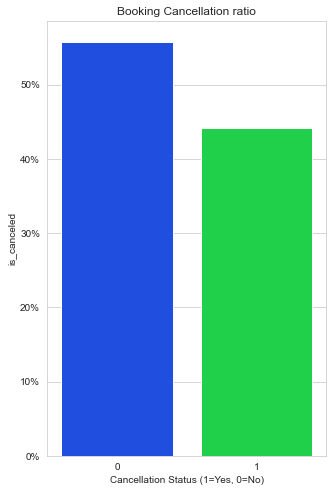

In [20]:
xCancelled, yCancelled = getCount(train_data["is_canceled"])
myPlot(xCancelled, yCancelled, xLable="Cancellation Status (1=Yes, 0=No)", yLable="% Percentage", title="Booking Cancellation ratio",figsize=(5,8),type='bar')

It can be seen that the **Booking cancelled almost 43 %** and the **Bookings not cancelled almost 57 %**

#### 2. Booking ratio (by hotel type)?

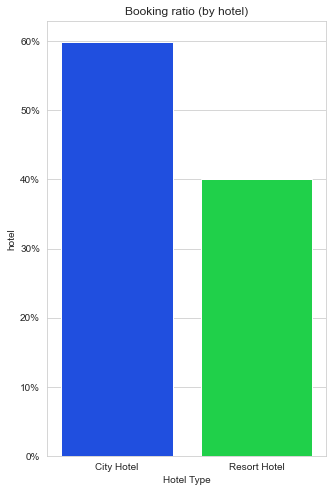

In [21]:
xBookingByHotel, yBookingByHotel = getCount(train_data['hotel'])
myPlot(xBookingByHotel, yBookingByHotel, xLable="Hotel Type", yLable="% Percentage", title="Booking ratio (by hotel)",figsize=(5,8),type='bar')

**City hotels have 60 %** booking rates and **Resort hotels have 40 %** booking rates

#### 3. Booking cancellation ratio (by hotel type)?

<AxesSubplot:xlabel='hotel', ylabel='count'>

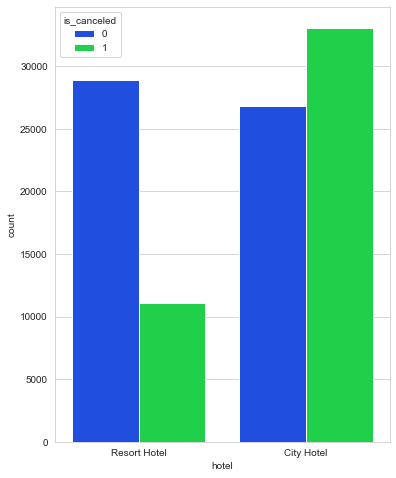

In [22]:
plt.subplots(figsize=(6,8))
sns.countplot(x='hotel',hue='is_canceled',data=train_data)

It can be seen that the **cancellation ratio of city hotel is more than that of resort hotels**

#### 4. Booking ratio (by years)?

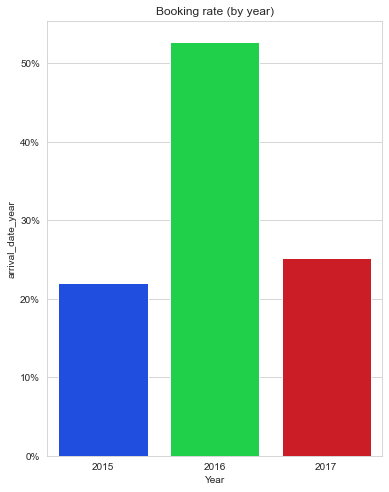

In [23]:
xYear, yYear = getCount(train_data['arrival_date_year'])
myPlot(xYear, yYear,"Year", "Percentage %","Booking rate (by year)",(6,8),'bar')

More than **50% of the booking happened in the year 2016** 

#### 5. Booking Cancellation ratio (by years)?

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

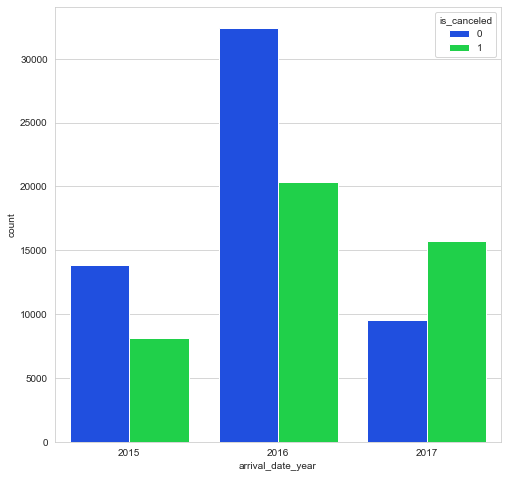

In [24]:
plt.subplots(figsize=(8,8))
sns.countplot(x='arrival_date_year',hue='is_canceled',data=train_data)

The cancellation rates of the year 2015 and 2016 are pretty similar, but the **cancellation rate of the year 2017 is very much high**

#### 6. Booking cancellation with respect to the months?

<AxesSubplot:xlabel='arrival_date_comb', ylabel='count'>

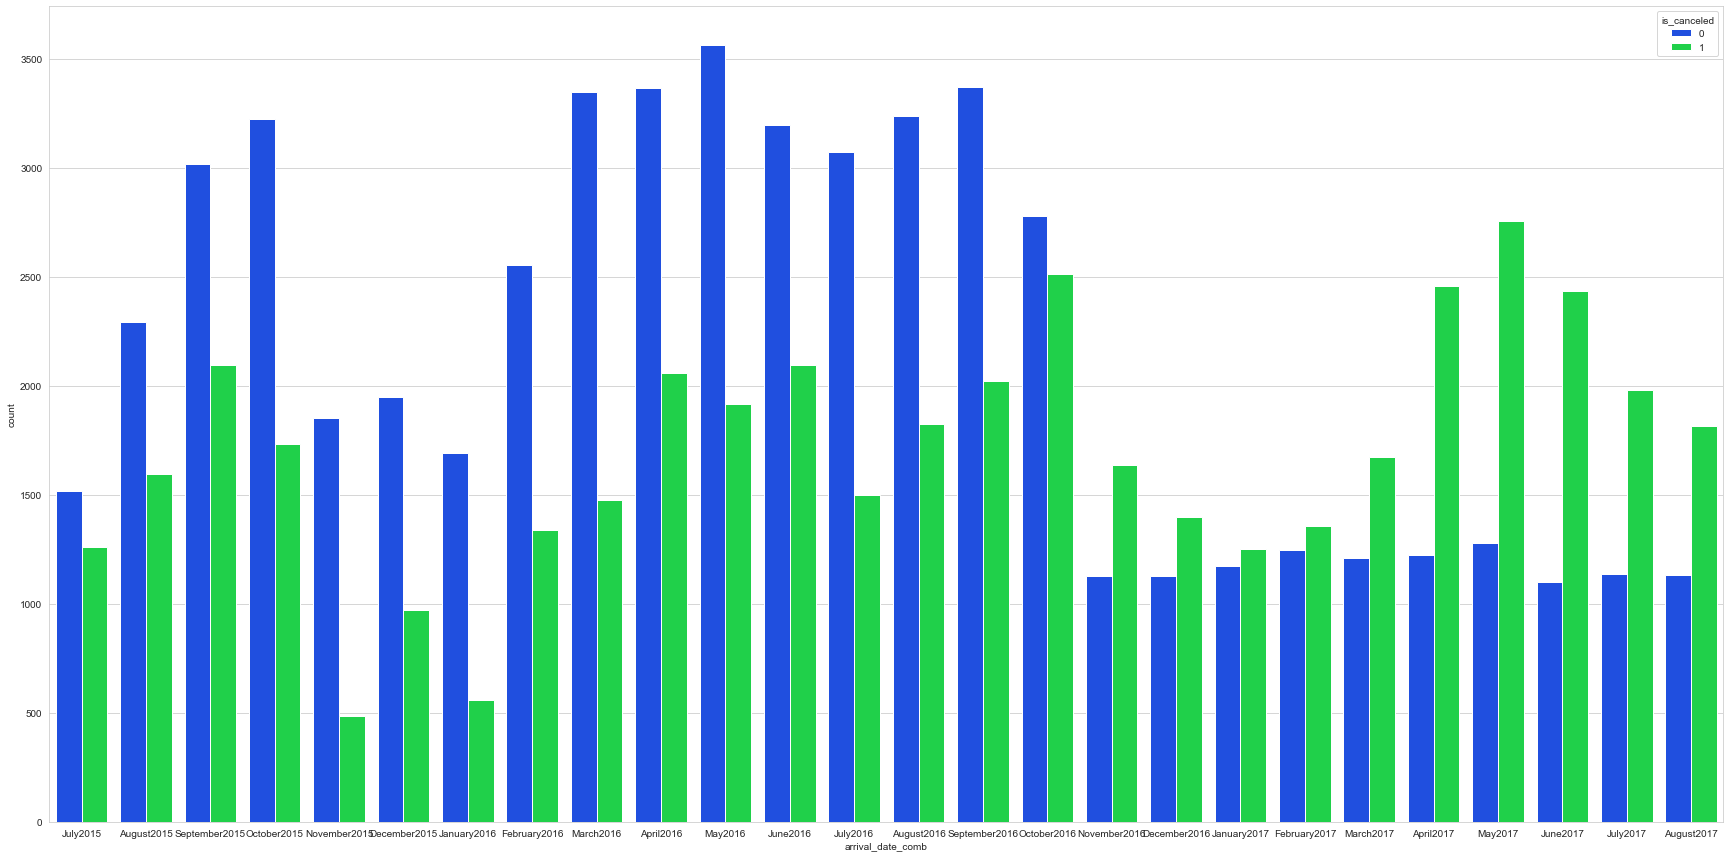

In [25]:
train_new = train_data.copy()
train_new['arrival_date_comb']= train_new['arrival_date_month'] + train_new['arrival_date_year'].astype(str)
train_new['arrival_date_comb']= train_new['arrival_date_month'] + train_new['arrival_date_year'].astype(str)
plt.subplots(figsize=(30,15))
sns.countplot(x='arrival_date_comb',hue='is_canceled',data=train_new)

The **highest number of cancellations happened in May 2017**, the cancellations of the Year 2017 is considerably increased

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

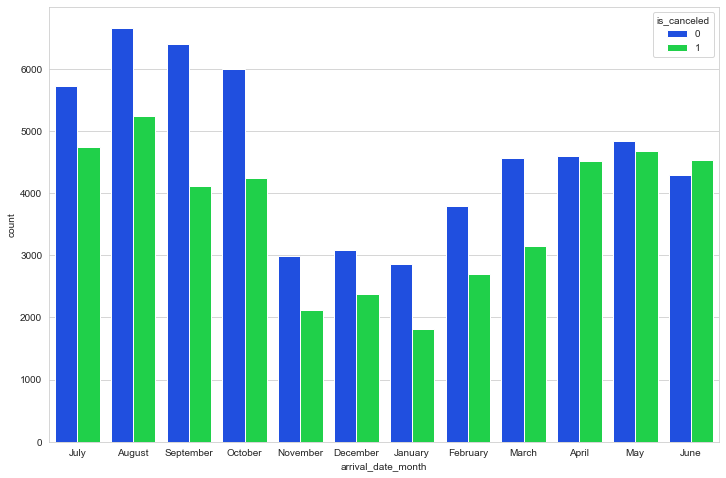

In [26]:
plt.subplots(figsize=(12,8))
sns.countplot(x='arrival_date_month',hue='is_canceled',data=train_data)

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

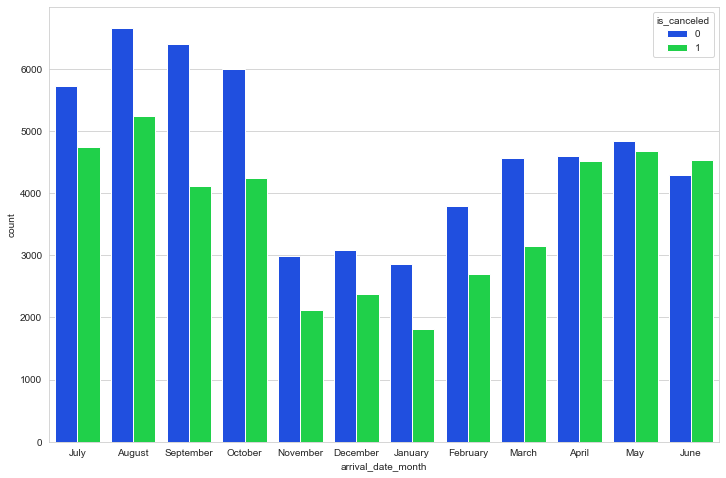

In [27]:
plt.subplots(figsize=(12,8))
sns.countplot(x='arrival_date_month',hue='is_canceled',data=train_data)

<ul>
    <li>The cancellation rates are high for the months between July to October.</li>
    <li>November - March have considerably reduced Cancellation rates</li>
    <li>Again April - June have a surge in Cancellation rates</li>
</ul>

**The cancellations reduce around the new year and increases with time**

#### 7. Busiest month?

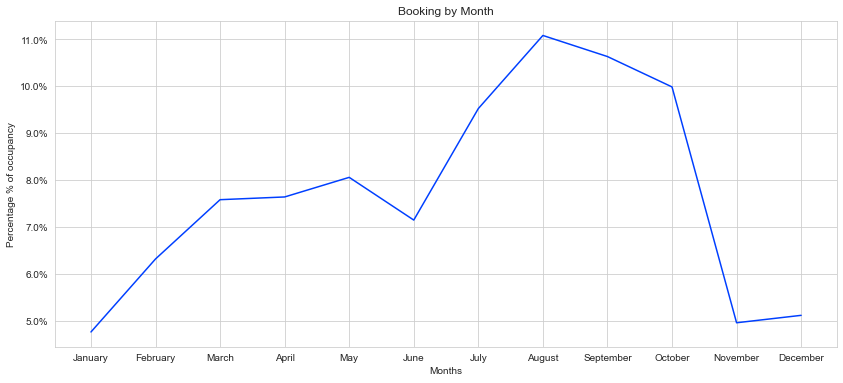

In [28]:
month = ['January','February','March','April','May','June','June','July','August','September','October','November','December']

##Lets take the non cancelled bookings for calculating busy month

data_non_cancelled = train_data[train_data['is_canceled']==0]
sorted_data = data_non_cancelled['arrival_date_month'].value_counts().reindex(month)

xMonths = sorted_data.index
yMonths = (sorted_data/sorted_data.sum())*100

myPlot(xMonths, yMonths.values, "Months", "Percentage % of occupancy","Booking by Month",(14,6),'line')

The busiest period of the hotel is from **July to August**

#### 7. Busiest month (by hotel type)?

<AxesSubplot:title={'center':'Booking By Month (Hotel Type)'}, xlabel='Months', ylabel='arrival_date_month'>

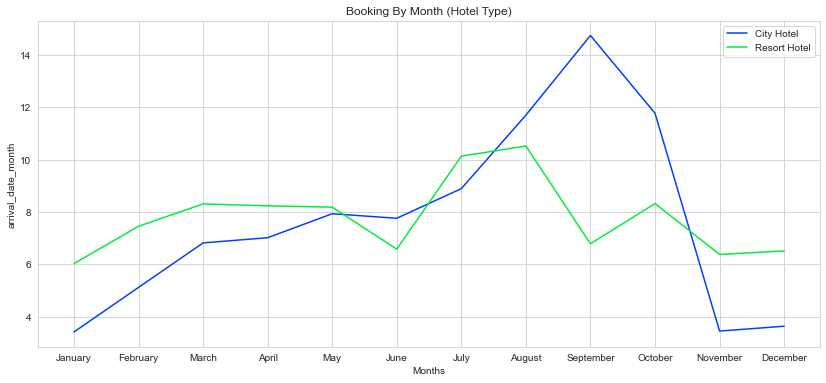

In [29]:
sorted_data = data_non_cancelled.loc[train_data['hotel']=='City Hotel','arrival_date_month'].value_counts().reindex(month)
xMonthsCity = sorted_data.index
yMonthsCity = (sorted_data/sorted_data.sum())*100

sorted_data = data_non_cancelled.loc[train_data['hotel']=='Resort Hotel','arrival_date_month'].value_counts().reindex(month)
xMonthsResort = sorted_data.index
yMonthsResort = (sorted_data/sorted_data.sum())*100

fig,axes = plt.subplots(figsize=(14,6))
axes.set_xlabel('Months')
axes.set_ylabel('Percentage % of occupancy')
axes.set_title('Booking By Month (Hotel Type)')
sns.lineplot(x=xMonthsCity,y=yMonthsCity,label='City Hotel',sort=False)
sns.lineplot(x=xMonthsResort,y=yMonthsResort,label='Resort Hotel',sort=False)

<ul>
    <li>The <b>city hotel's busy period is from July to October</b>, while the <b>resort hotel's busy period is from July to August</b></li>
<li>The trend of resort hotel is clearly different, the <b>occupancy percentage of resort hotel is less when compared to city hotels from July to October</b></li>
<li>In the same time the <b>occupancy rate of resort hotels is more than that of city hotels around the new year which indicates tourists guest</b></li>
</ul>

#### 8. Customers by country?

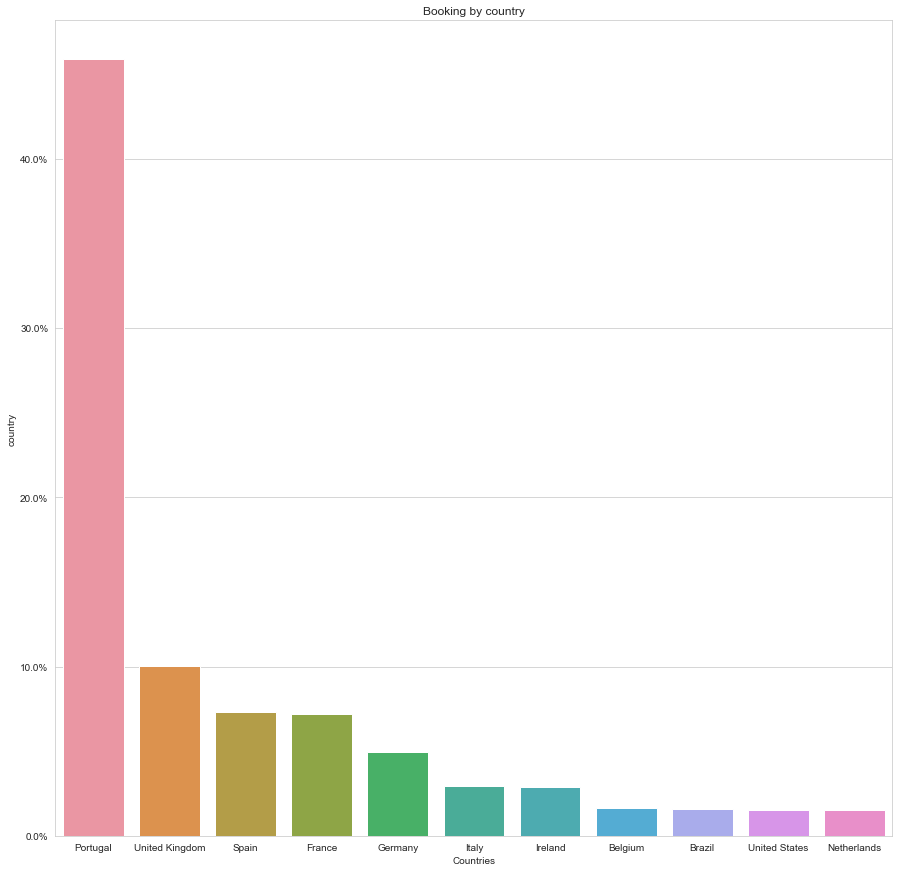

In [30]:
xCustomers, yCustomers = getCount(train_data['country'])

xCustomers = xCustomers[:][:11]
yCustomers = yCustomers[:][:11]

country_name = [pc.countries.get(alpha_3=name) for name in xCustomers]

def isNone(data):
    if(data==None):
        return True
    else:
        return False

country_name = [x for x in country_name if not isNone(x)]
country_name = [country_name[i].name for i in range(0,len(country_name))]

myPlot(country_name,yCustomers,"Countries","% Booking","Booking by country", (15,15),'bar')

The customers coming from Portugal, UK, Spain, France and Germany was very high. 
**Portugal alone contributes to nearly 50 % of the guests**

#### 9.Duration of stay?

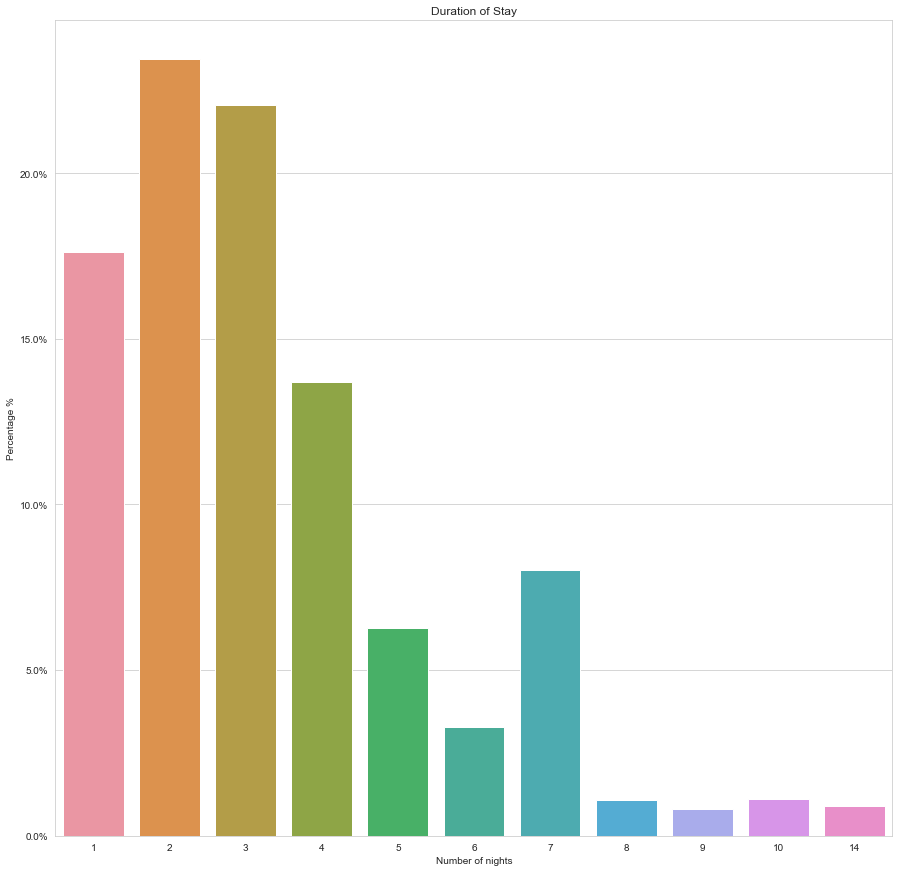

In [31]:
totalStay = train_data['stays_in_week_nights'] + train_data['stays_in_weekend_nights']
xStay, yStay = getCount(totalStay)

xStay = xStay[:][0:11]
yStay = yStay[:][0:11]

myPlot(xStay,yStay,"Number of nights","Percentage %","Duration of Stay",(15,15),'bar')

The duration of stays in majority is **1,2,3 and 4,they contribute nearly 70 %**

#### 10.Duration of stay (by hotel type)?

<AxesSubplot:xlabel='total_stay', ylabel='count'>

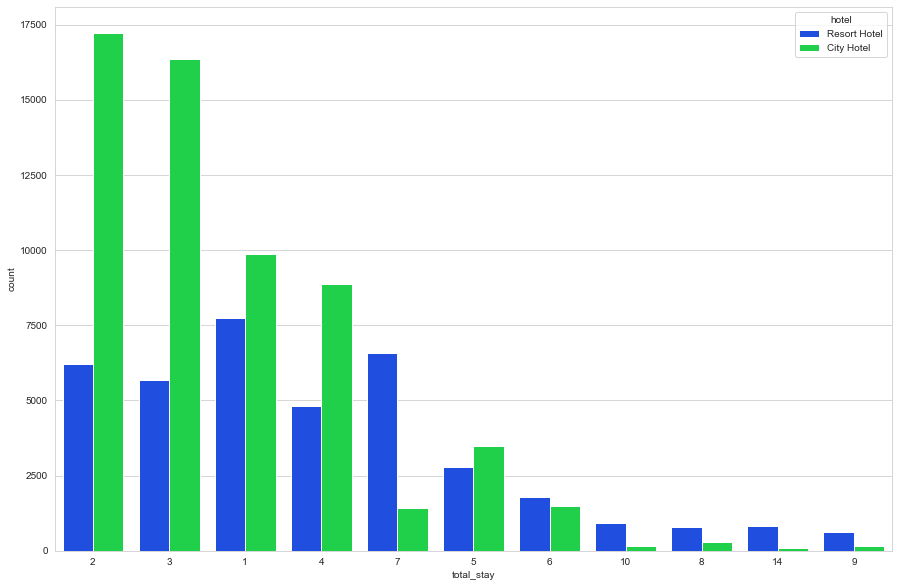

In [32]:
train_new['total_stay'] = train_new['stays_in_week_nights'] + train_new['stays_in_weekend_nights']
plt.subplots(figsize=(15,10))
sns.countplot(x='total_stay',hue='hotel',data=train_new, order=train_new.total_stay.value_counts().iloc[:11].index)

<ul>
    <li>For <b>city hotel: 1,2,3 and 4 number of night stays</b> corresponds to the large amount</li>
    <li>For <b>resort hotel: 1,2,3,4 and 7 number of night stays</b> corresponds to the large amount</li>
</ul>

#### 11.Stay by Accomodation Type?

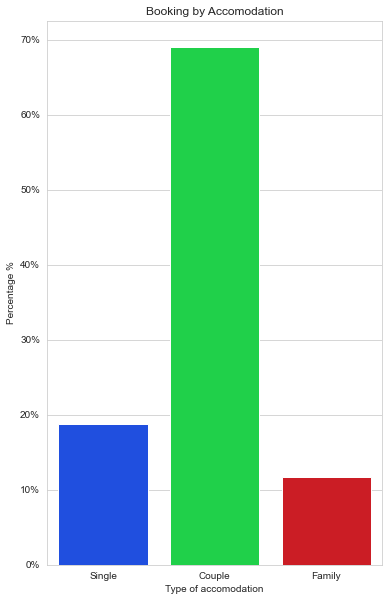

In [33]:
single = train_data[(train_data.adults==1) & (train_data.children==0) & (train_data.babies==0)]
couple = train_data[(train_data.adults==2) & (train_data.children==0) & (train_data.babies==0)]
family = train_data[train_data.adults+train_data.children+train_data.babies > 2]

label = ['Single', 'Couple', 'Family']
count = [single.shape[0],couple.shape[0],family.shape[0]]
countPercent = [(i/train_data.shape[0])*100 for i in count]

myPlot(label, countPercent,"Type of accomodation","Percentage %","Booking by Accomodation",(6,10),'bar')

**Couple type (exactly 2 people) contribute to almost 70 % of the total accomodation**

#### 12.Bookings by Market Segment?

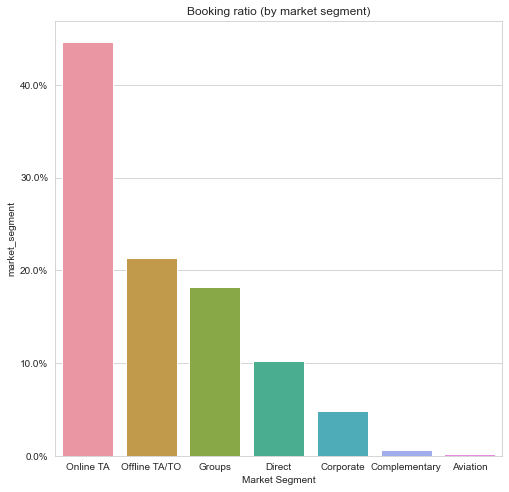

In [34]:
xBookingBySegment, yBookingBySegment = getCount(train_data['market_segment'])
xBookingBySegment = xBookingBySegment[:][:-1]
yBookingBySegment = yBookingBySegment[:][:-1]
myPlot(xBookingBySegment, yBookingBySegment, xLable="Market Segment", yLable="% Percentage", title="Booking ratio (by market segment)",figsize=(8,8),type='bar')


**Online type of bookings is the most and corresponds to nearly 43% of the total share**

#### 13.Cancellation by Market Segment?

In [35]:
train_data['arrival_date'] = train_data['arrival_date_year'].astype(str) + '-' + train_data['arrival_date_month'] + '-' + train_data['arrival_date_day_of_month'].astype(str)
train_data['arrival_date'] = train_data['arrival_date'].apply(pd.to_datetime)
train_data['reservation_status_date'] = train_data['reservation_status_date'].apply(pd.to_datetime)
cancelled_data = train_data[train_data['reservation_status'] == 'Canceled']
cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days

<ipython-input-35-0159ceb261f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
<ipython-input-35-0159ceb261f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days


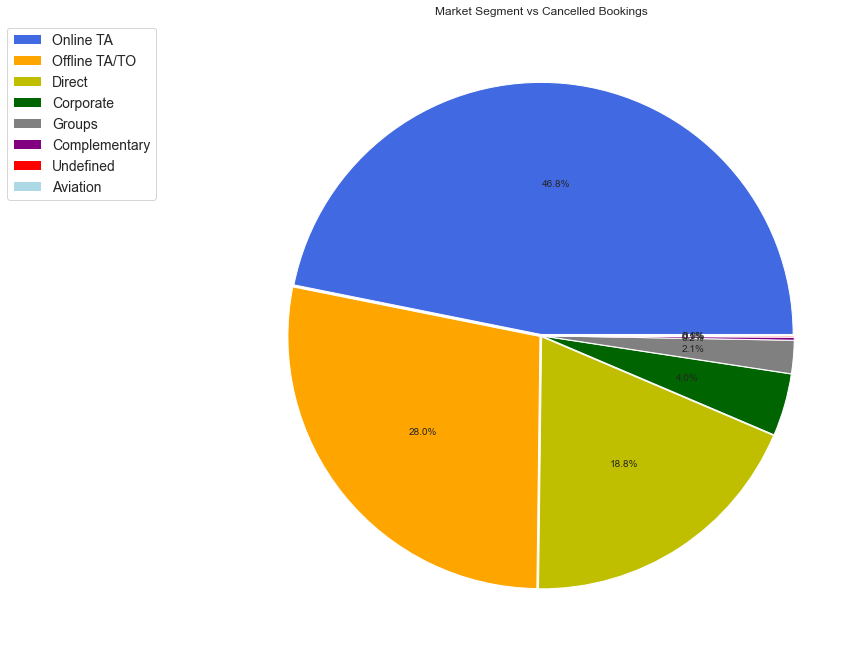

In [36]:
plt.figure(figsize=(12,12))
explode = [0.005] * len(cancelled_data['market_segment'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['market_segment'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['market_segment'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()

<ul>
    <li>About 47% of the booking cancellation were made in Online TA, 26% cancellations were made in offline TA, 18.8% cancellations in direct booking</li>
    <li>These three are the areas prone for cancellation</li>
</ul>

#### 14.Bookings by customer type?

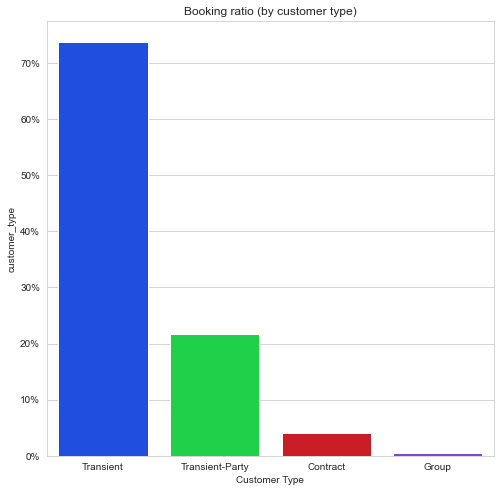

In [37]:
xBookingCustType, yBookingCustType = getCount(train_data['customer_type'])
myPlot(xBookingCustType, yBookingCustType, xLable="Customer Type", yLable="% Percentage", title="Booking ratio (by customer type)",figsize=(8,8),type='bar')

**Transient customers almost account to nearly 70 %** of the overall booking, hence these customers should be served well

#### 15.Cancellations by customer type?

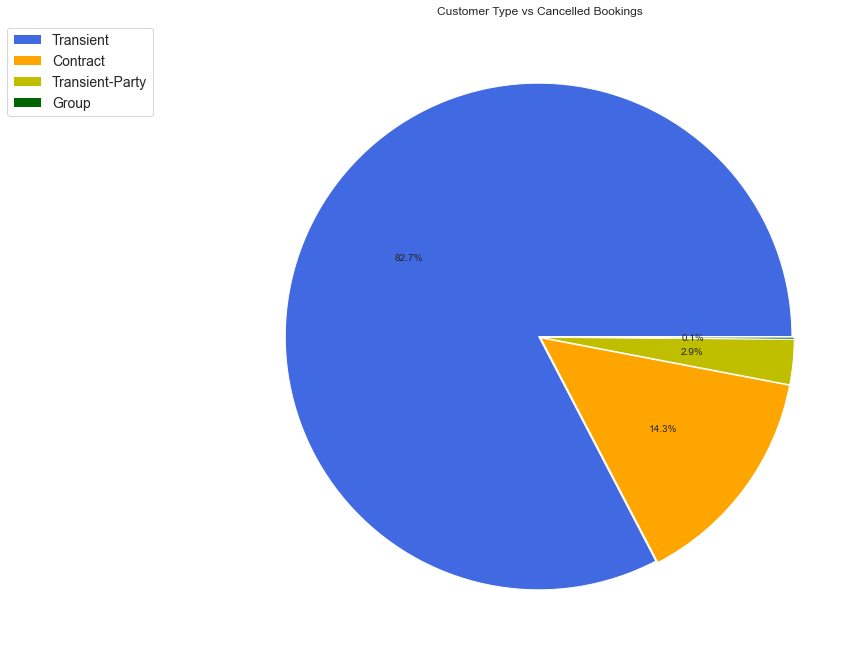

In [38]:
plt.figure(figsize=(12,12))
explode = [0.005] * len(cancelled_data['customer_type'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['customer_type'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['customer_type'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Customer Type vs Cancelled Bookings')
plt.tight_layout()
plt.show()

**Transient customers contributes to nearly 83% of the overall cancellations**

#### 16.Cancellations by customer with deposit type?

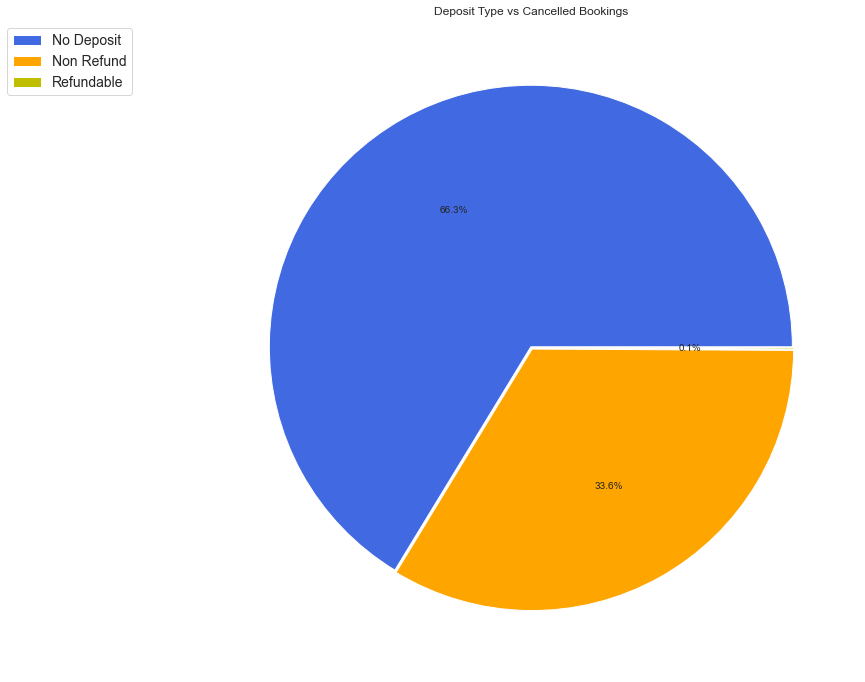

In [39]:
plt.figure(figsize=(12,12))
explode = [0.005] * len(cancelled_data['deposit_type'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['deposit_type'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['deposit_type'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Deposit Type vs Cancelled Bookings')
plt.tight_layout()
plt.show()

#### 17.Cancellations with respect to the arrival date?

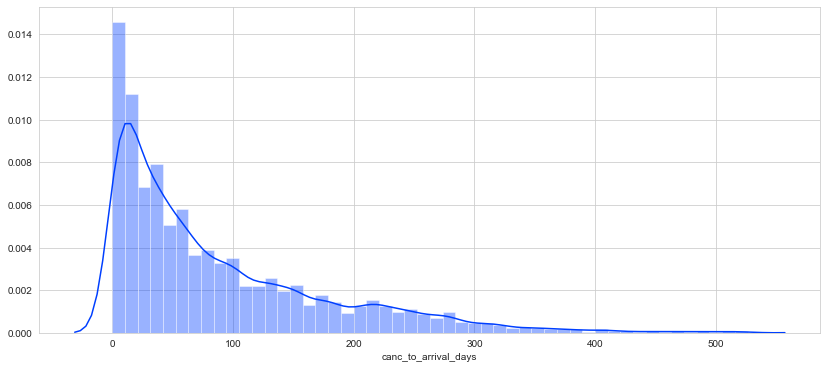

In [41]:
plt.figure(figsize=(14,6))
sns.distplot(cancelled_data['canc_to_arrival_days'])
plt.show()

In [42]:
print('Percentage of cancellations that are within a week of arrival: ', 
      (cancelled_data[cancelled_data['canc_to_arrival_days']<=7]['canc_to_arrival_days'].count()*100/cancelled_data['canc_to_arrival_days'].count()).round(2), '%')

Percentage of cancellations that are within a week of arrival:  11.92 %


#### 18.Cancellations with respect to other categorical variables?

<AxesSubplot:xlabel='meal', ylabel='count'>

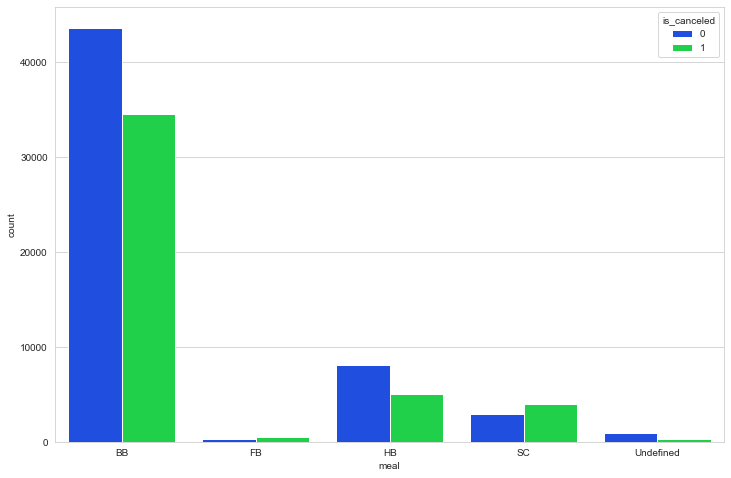

In [43]:
plt.subplots(figsize=(12,8))
sns.countplot(x='meal',hue='is_canceled',data=train_data)

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

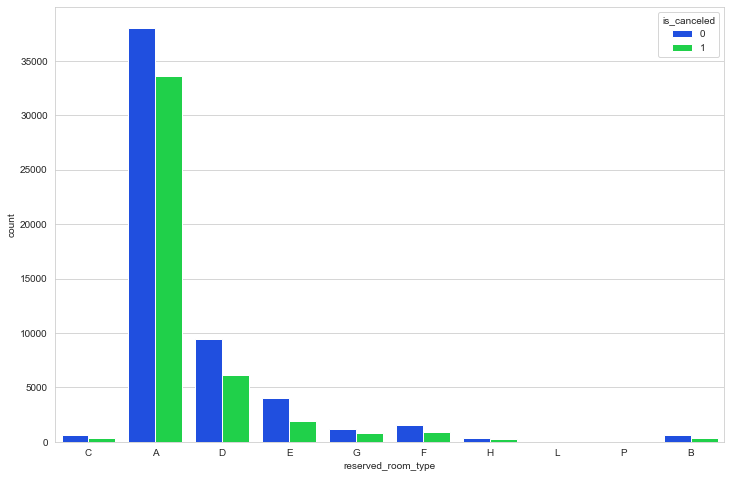

In [44]:
plt.subplots(figsize=(12,8))
sns.countplot(x='reserved_room_type',hue='is_canceled',data=train_data)

<AxesSubplot:xlabel='reservation_status', ylabel='count'>

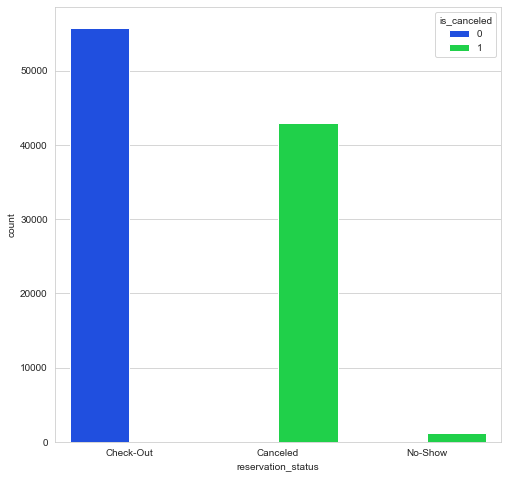

In [45]:
plt.subplots(figsize=(8,8))
sns.countplot(x='reservation_status',hue='is_canceled',data=train_data)

## 3. Feature Engineering and Feature Selection

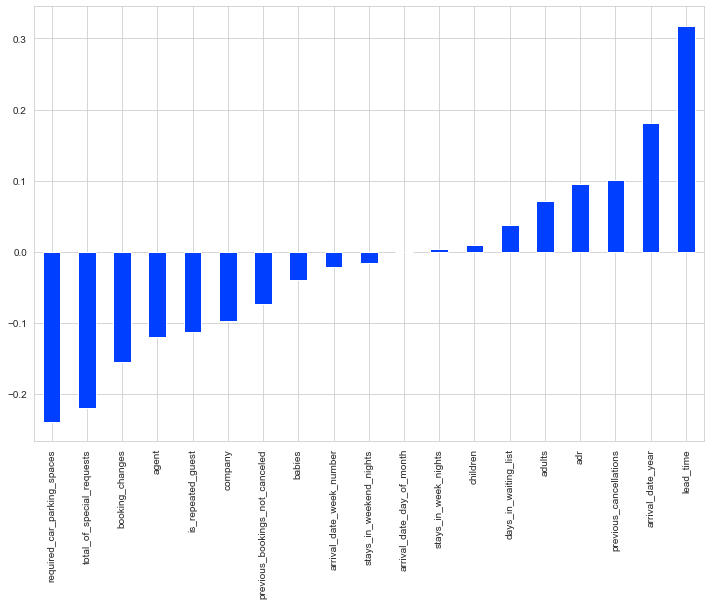

In [46]:
plt.figure(figsize=(12,8))
train_data.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

The **lead time has considerably higher correlation** with respect to the cancellation hence it can be considered as a good feature to consider

#### The attributes ***assigned_room_type*** and ***reserved_room_type*** are important features to consider the cancellation rate, therefore we can combine these two features as a single feature **is_assigned_same_room**

In [47]:
train_data['is_assigned_same_room'] = 0
train_data.loc[train_data['reserved_room_type']==train_data['assigned_room_type'],'is_assigned_same_room']=1

#### The attributes ***previous_cancellations*** and ***previous_booking_not_cancelled*** are important features to consider the cancellation rate, therefore we can combine these two features as a single feature **is_cancelled_high**

In [48]:
train_data['is_cancelled_high'] = 0
train_data.loc[train_data['previous_cancellations']>train_data['previous_bookings_not_canceled'], 'is_cancelled_high']=1

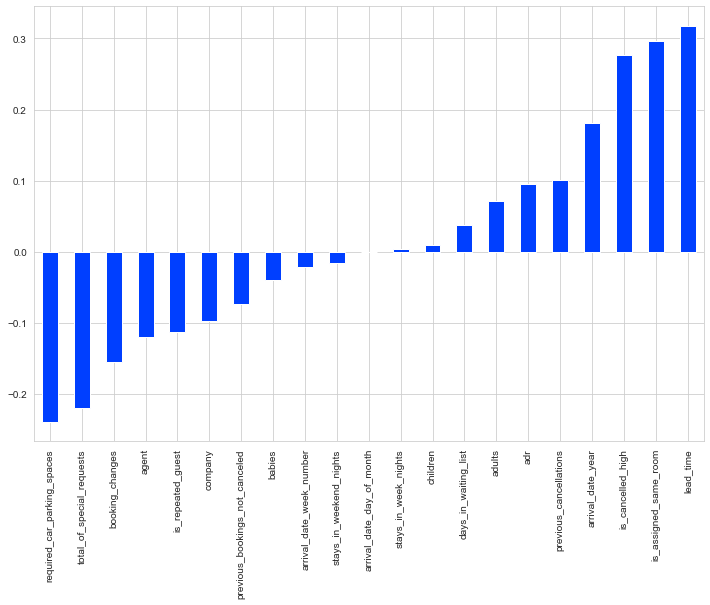

In [49]:
plt.figure(figsize=(12,8))
train_data.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

<ul>
    <li>The correlation coefficients of <b>lead_time, is_assigned_same_room, is_cancelled_high</b> is considerably good and have a positive correlation</li>
    <li>Hence, this can be made as the primary features</li>
</ul>

Now let's remove the attributes with less important features

In [50]:
train_data = train_data.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','reservation_status_date','arrival_date'], axis=1)

## 4. Transformations

### Utility Function

In [51]:
def transform(data):
    
    '''
       Takes in a dataframe as input and returns a new dataframe with the categorical values be label encoded
       
       Input:
           Dataframe
       
       Output:
           Dataframe with encoded categorical values
    '''
    
    from sklearn.preprocessing import LabelEncoder
    
    labelEncoder = LabelEncoder()
    
    categorical_feat = list(data.columns[data.dtypes == object])
    
    print(categorical_feat)
    
    for x in categorical_feat:
        data[x] = labelEncoder.fit_transform(data[x])
    
    return data

In [52]:
train_data = transform(train_data)

['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel', 'customer_type']


In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1001 to 101000
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           100000 non-null  int32  
 1   is_canceled                     100000 non-null  int64  
 2   lead_time                       100000 non-null  int64  
 3   arrival_date_year               100000 non-null  int64  
 4   arrival_date_month              100000 non-null  int32  
 5   arrival_date_week_number        100000 non-null  int64  
 6   arrival_date_day_of_month       100000 non-null  int64  
 7   stays_in_weekend_nights         100000 non-null  int64  
 8   stays_in_week_nights            100000 non-null  int64  
 9   adults                          100000 non-null  int64  
 10  children                        100000 non-null  int64  
 11  babies                          100000 non-null  int64  
 12  market_segmen

In [54]:
train_data = train_data[['is_canceled',
 'hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_assigned_same_room',
 'is_cancelled_high']]

## 5. Modelling

In [55]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

### Utility Function

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [57]:
model_accuracy_results = {}

In [58]:
def model_accuracy(y_test, y_pred):
    '''
        Takes in the actual test results and predicted test results and returns the accuracy of the model
        
        Input:
            Actual test results(vector or data frame) and predicted test results(vector or data frame)
            
        Output:
            Accuracy of the model
    '''
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    return accuracy

In [59]:
def get_confustion_matrix(y_test, y_pred):
    '''
        Takes in the actual test results and predicted test results and returns the confusion matrix
        
        Input:
            Actual test results(vector or data frame) and predicted test results(vector or data frame)
            
        Output:
            Confusion matrix
    '''
    cm = confusion_matrix(y_test, y_pred)
    return cm

In [60]:
def train(x_train,y_train,x_test,y_test,model):
    '''
        Takes in the training and testing datasets with dependent and independant variables along with the model name
        ('base','logreg','knn','svm','randomforest') as input
        
        Then fit, train and returns the model as the output
        
        Input:
            X_train, y_train, X_test, y_test and model name ('base','logreg','knn','svm','randomforest')
        
        Ouptut:
            Trained Model
    
    '''
    if model=='base':
        (unique, counts) = np.unique(y_train, return_counts=True)
        if counts[0]  > counts[1]:
            idx = 0
        else:
            idx = 1
        if idx == 0:
            y_pred = np.zeros(y_test.shape)
        else:
            y_pred = np.ones(y_test.shape)
        model_accuracy_results['Baseline'] = model_accuracy(y_test, y_pred)
        
    if model=='logreg':
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0, max_iter=250)
        classifier.fit(x_train, y_train)
        
        y_pred = classifier.predict(x_test)
        
        model_accuracy_results['LogisticRegression'] = model_accuracy(y_test, y_pred)
        return classifier
    
    if(model=='knn'):
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 10)
        classifier.fit(x_train,y_train)
        
        y_pred = classifier.predict(x_test)

        model_accuracy_results['KNearestNeighbors'] = model_accuracy(y_test, y_pred)
        return classifier
    if(model=='svm'):
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state=0)
        classifier.fit(x_train,y_train)

        y_pred = classifier.predict(x_test)

        model_accuracy_results['SVM'] = model_accuracy(y_test, y_pred)
        return classifier
    if(model=='randomforest'):
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
        classifier.fit(x_train,y_train)

        y_pred = classifier.predict(x_test)

        model_accuracy_results['RandomForest'] = model_accuracy(y_test, y_pred)
        return classifier

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### 1.Train Test split

In [62]:
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### 2.Standardization

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 3.Model Training

In [64]:
train(X_train,y_train,X_test,y_test,'base')
log_reg_test = train(X_train,y_train,X_test,y_test,'logreg')
knn_test = train(X_train,y_train,X_test,y_test,'knn')
svm_test = train(X_train,y_train,X_test,y_test,'svm')
random_forest_test = train(X_train,y_train,X_test,y_test,'randomforest')

#### 4.Accuracy Test

In [65]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
Baseline,55.09
LogisticRegression,78.61
KNearestNeighbors,86.15
SVM,86.07
RandomForest,89.80


Of the above 4 models, the random forest works best! Let's evaluate the model further

<AxesSubplot:>

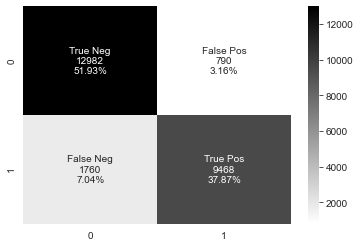

In [66]:
orf_cm = confusion_matrix(y_test, random_forest_test.predict(X_test))

names = ['True Neg','False Pos','False Neg','True Pos'] 
values = [value for value in orf_cm.flatten()] 
percentages = [str(perc.round(2))+'%' for perc in orf_cm.flatten()*100/np.sum(orf_cm)] 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,values,percentages)] 
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(orf_cm, annot=labels, fmt='', cmap='binary')

In [67]:
f1_score(y_test, random_forest_test.predict(X_test))

0.8813180675788885

In [68]:
roc_auc_score(y_test, random_forest_test.predict(X_test))

0.8929431276379401

The model performs well but there are more flase negatives as we can see in the confusion matrix. Lets enhance the random forest with some optimizations

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,25,50,100,500] , 'criterion': ['entropy', 'gini']}]
randomforestclassifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = randomforestclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'n_estimators': [10, 25, 50, 100, 500]}],
             scoring='accuracy')

In [70]:
print('Best Score: ', grid_search.best_score_.round(2))
print('Best Parameters: ', grid_search.best_params_)

Best Score:  0.91
Best Parameters:  {'criterion': 'gini', 'n_estimators': 500}


We will choose the above best parameters to retrain the model

In [71]:
random_forest_optimized_test = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
random_forest_optimized_test.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [72]:
y_pred = random_forest_optimized_test.predict(X_test)
model_accuracy_results['OptimizedRandomForest'] = model_accuracy(y_test, y_pred)

In [73]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
Baseline,55.09
LogisticRegression,78.61
KNearestNeighbors,86.15
SVM,86.07
RandomForest,89.80
OptimizedRandomForest,90.66


<AxesSubplot:>

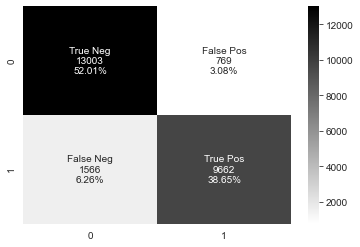

In [74]:
orf_cm = confusion_matrix(y_test, random_forest_optimized_test.predict(X_test))

names = ['True Neg','False Pos','False Neg','True Pos'] 
values = [value for value in orf_cm.flatten()] 
percentages = [str(perc.round(2))+'%' for perc in orf_cm.flatten()*100/np.sum(orf_cm)] 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,values,percentages)] 
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(orf_cm, annot=labels, fmt='', cmap='binary')

In [75]:
f1_score(y_test, random_forest_optimized_test.predict(X_test))

0.8921926220047094

In [76]:
roc_auc_score(y_test, random_forest_optimized_test.predict(X_test))

0.902344660629659

Thus the, accuracy of the model has reached about 90.59% 
The F1 score of the model is around 89%

## 6. Final Model Creation Script

### Utility Functions

In [77]:
def train_model(train_df):
    
    #data cleaning
    train_df['company'].fillna(0, inplace=True)
    train_df['agent'].fillna(0, inplace=True)
    train_df['country'].fillna(train_df.country.mode().to_string(), inplace=True)
    train_df['children'].fillna(train_df.children.mean(), inplace=True)
    
    #data type conversion
    train_df[['children', 'company', 'agent']] = train_df[['children', 'company', 'agent']].astype('int64')
    
    #data transoformation
    train_df['is_assigned_same_room'] = 0
    train_df.loc[train_df['reserved_room_type']==train_df['assigned_room_type'],'is_assigned_same_room']=1
    
    train_df['is_cancelled_high'] = 0
    train_df.loc[train_df['previous_cancellations']>train_df['previous_bookings_not_canceled'], 'is_cancelled_high']=1
    
    train_df = train_df[['is_canceled',
                             'hotel',
                             'lead_time',
                             'arrival_date_year',
                             'arrival_date_month',
                             'arrival_date_week_number',
                             'arrival_date_day_of_month',
                             'stays_in_weekend_nights',
                             'stays_in_week_nights',
                             'adults',
                             'children',
                             'babies',
                             'market_segment',
                             'distribution_channel',
                             'is_repeated_guest',
                             'previous_cancellations',
                             'previous_bookings_not_canceled',
                             'booking_changes',
                             'agent',
                             'company',
                             'days_in_waiting_list',
                             'customer_type',
                             'adr',
                             'required_car_parking_spaces',
                             'total_of_special_requests',
                            'is_assigned_same_room',
                            'is_cancelled_high']]
    train_df = transform(train_df)
    X_train = train_df.iloc[:, 1:].values
    y_train = train_data.iloc[:, 0].values
    X_train = scaler.fit_transform(X_train)
    model = RandomForestClassifier(n_estimators=500, criterion='gini', random_state=0)
    model.fit(X_train,y_train)
    return model

In [78]:
def transform_test(test_df):
    #data cleaning
    test_df['company'].fillna(0, inplace=True)
    test_df['agent'].fillna(0, inplace=True)
    test_df['country'].fillna(test_df.country.mode().to_string(), inplace=True)
    test_df['children'].fillna(test_df.children.mean(), inplace=True)
    
    #data type conversion
    test_df[['children', 'company', 'agent']] = test_df[['children', 'company', 'agent']].astype('int64')
    
    #data transoformation
    test_df['is_assigned_same_room'] = 0
    test_df.loc[test_df['reserved_room_type']==test_df['assigned_room_type'],'is_assigned_same_room']=1
    
    test_df['is_cancelled_high'] = 0
    test_df.loc[test_df['previous_cancellations']>test_df['previous_bookings_not_canceled'], 'is_cancelled_high']=1
    
    test_df = test_df[[      'hotel',
                             'lead_time',
                             'arrival_date_year',
                             'arrival_date_month',
                             'arrival_date_week_number',
                             'arrival_date_day_of_month',
                             'stays_in_weekend_nights',
                             'stays_in_week_nights',
                             'adults',
                             'children',
                             'babies',
                             'market_segment',
                             'distribution_channel',
                             'is_repeated_guest',
                             'previous_cancellations',
                             'previous_bookings_not_canceled',
                             'booking_changes',
                             'agent',
                             'company',
                             'days_in_waiting_list',
                             'customer_type',
                             'adr',
                             'required_car_parking_spaces',
                             'total_of_special_requests',
                            'is_assigned_same_room',
                            'is_cancelled_high']]
    test_df = transform(test_df)
    test_df = test_df.iloc[:,:].values
    test_df = scaler.fit_transform(test_df)
    return test_df

File loading and model training

In [79]:
train_df = pd.read_csv('train.csv',index_col=0)

In [80]:
model = train_model(train_df)

['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel', 'customer_type']


<ipython-input-51-964b2a8fb6ff>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x] = labelEncoder.fit_transform(data[x])


In [81]:
test_df = pd.read_csv('test.csv',index_col=0)

In [82]:
test_df = transform_test(test_df)

['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel', 'customer_type']


<ipython-input-51-964b2a8fb6ff>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x] = labelEncoder.fit_transform(data[x])


In [83]:
pred_res = model.predict(test_df)

In [84]:
pred_res

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [85]:
submission = pd.read_csv('submission.csv')

In [86]:
submission['is_canceled'] = pred_res

In [87]:
submission['is_canceled'].value_counts()

0    17200
1     2190
Name: is_canceled, dtype: int64

In [88]:
submission.to_csv('submission.csv',index=False)

### Creating A pickle file for exporting the model

In [89]:
#importing the pickle library which is a part of pythons in built packages
import pickle
# save the model to disk
filename = 'optimized_random_forest_model.sav'
pickle.dump(model, open(filename, 'wb'))

+ guideline for importing the model
 + the model name is 'optimized_random_forest_model.sav'
 + load the model and use the score function to test it and the predict funtion to get the output

In [94]:
loaded_model = pickle.load(open('optimized_random_forest_model.sav', 'rb'))

result_of_train = loaded_model.score(X_test, y_test)
result_of_test = loaded_model.predict(test_df)
print(result_of_train)

0.99244


In [95]:
print(result_of_test)

[0 0 0 ... 0 1 0]


## 7. Conclusion

Thus the data cleaning, EDA, transformation and modelling has been done successfully!